In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Activation
import seaborn as sns

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
df = pd.read_excel("/content/E Commerce Dataset.xlsx", sheet_name = "E Comm")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.00000,Mobile Phone,3,6.00000,Debit Card,Female,3.00000,3,Laptop & Accessory,2,Single,9,1,11.00000,1.00000,1.00000,5.00000,159.93000
1,50002,1,NaN,Phone,1,8.00000,UPI,Male,3.00000,4,Mobile,3,Single,7,1,15.00000,0.00000,1.00000,0.00000,120.90000
2,50003,1,NaN,Phone,1,30.00000,Debit Card,Male,2.00000,4,Mobile,3,Single,6,1,14.00000,0.00000,1.00000,3.00000,120.28000
3,50004,1,0.00000,Phone,3,15.00000,Debit Card,Male,2.00000,4,Laptop & Accessory,5,Single,8,0,23.00000,0.00000,1.00000,3.00000,134.07000
4,50005,1,0.00000,Phone,1,12.00000,CC,Male,NaN,3,Mobile,5,Single,3,0,11.00000,1.00000,1.00000,3.00000,129.60000


# DATA PREPROCESSING

In [ ]:
# dropping Customer ID Column
df.drop("CustomerID", axis=1, inplace=True)

In [ ]:
# Impue NULL valued examples from the dataset
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

1. PreferredLogInDevice - obj
2. PreferredPaymentMode - obj
3. Gender - obj
4. PreferedOrderCat - obj
5. MaritalStatus - obj

We need to encode these into numerical data

In [ ]:
# separate out the Numerical and Categorical Columns to perform imputation on
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

numerical_cols = ['Churn', 'Tenure',  'CityTier',
       'WarehouseToHome',  'HourSpendOnApp',
       'NumberOfDeviceRegistered',  'SatisfactionScore',
        'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']

In [ ]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
df[numerical_cols] = mean_imputer.fit_transform(df[numerical_cols])

In [ ]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
# We will encode the catagorical variables using One-Hot Encoding

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
encoder.fit(df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)
df[encoded_cols] = encoder.transform(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

['PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone', 'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery', 'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI', 'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']


In [ ]:
# Now we form the feature matrix and the target variable column vector from df

X = df[numerical_cols+encoded_cols]
X.drop("Churn", axis=1, inplace=True)

y = df["Churn"]

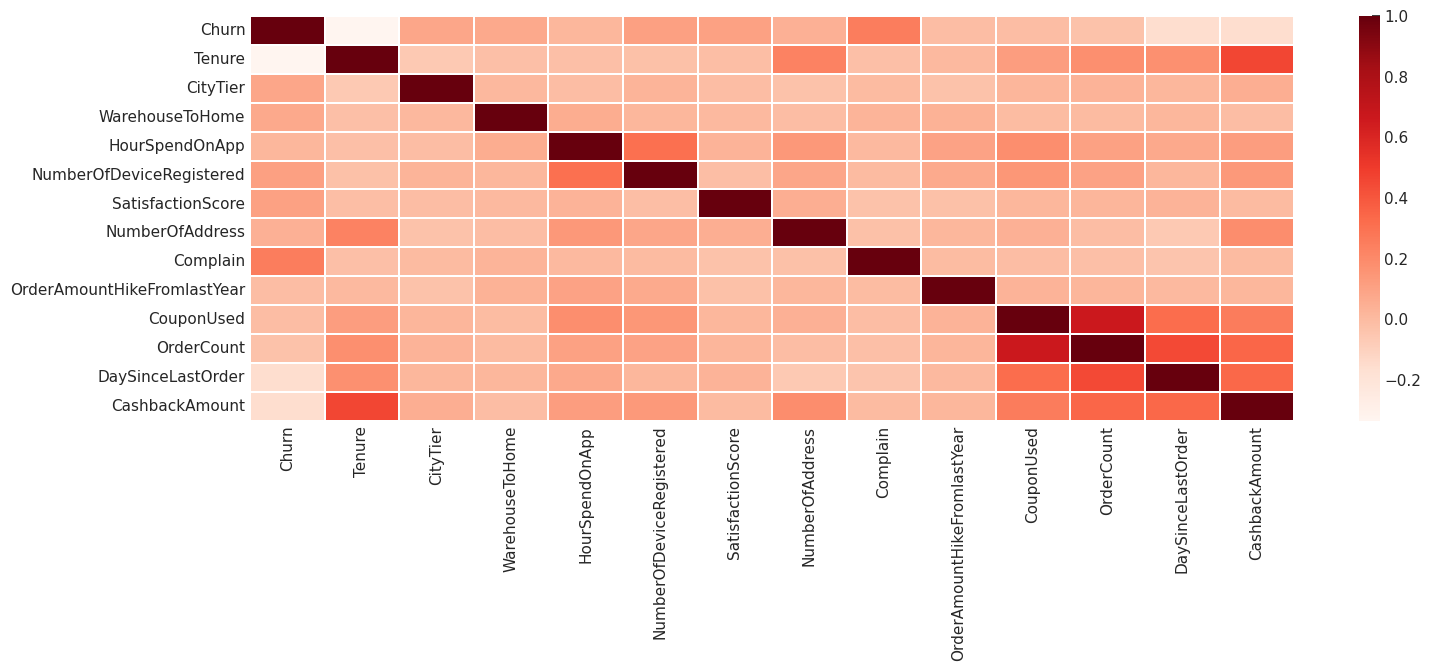

In [ ]:
corr = df[numerical_cols].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show();

In [ ]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.00,-0.34,0.08,0.07,0.02,0.11,0.11,0.04,0.25,-0.01,-0.01,-0.03,-0.16,-0.15
Tenure,-0.34,1.00,-0.06,-0.02,-0.02,-0.02,-0.01,0.23,-0.02,0.00,0.12,0.18,0.18,0.46
CityTier,0.08,-0.06,1.00,0.01,-0.01,0.03,-0.01,-0.03,0.00,-0.03,0.02,0.03,0.02,0.06
WarehouseToHome,0.07,-0.02,0.01,1.00,0.06,0.02,0.01,-0.01,0.03,0.04,-0.00,0.00,0.02,-0.01
HourSpendOnApp,0.02,-0.02,-0.01,0.06,1.00,0.31,0.03,0.14,0.01,0.10,0.18,0.10,0.07,0.12
NumberOfDeviceRegistered,0.11,-0.02,0.03,0.02,0.31,1.00,-0.02,0.08,0.00,0.07,0.15,0.10,0.02,0.14
SatisfactionScore,0.11,-0.01,-0.01,0.01,0.03,-0.02,1.00,0.05,-0.03,-0.03,0.02,0.02,0.03,0.00
NumberOfAddress,0.04,0.23,-0.03,-0.01,0.14,0.08,0.05,1.00,-0.03,0.02,0.04,-0.01,-0.06,0.19
Complain,0.25,-0.02,0.00,0.03,0.01,0.00,-0.03,-0.03,1.00,-0.00,-0.01,-0.02,-0.04,0.00
OrderAmountHikeFromlastYear,-0.01,0.00,-0.03,0.04,0.10,0.07,-0.03,0.02,-0.00,1.00,0.03,0.02,0.01,0.01


In [ ]:

y.value_counts()

0.00000    4682
1.00000     948
Name: Churn, dtype: int64

# HANDLING CLASS IMBALANCES

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
y.value_counts()

1.00000    4682
0.00000    4682
Name: Churn, dtype: int64

# CREATE THE TRAIN AND TEST SETS

In [ ]:
# Perform the Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=99)

In [ ]:
X_train.shape

(7491, 34)

In [ ]:
y_train.value_counts()

1.0    3760
0.0    3731
Name: Churn, dtype: int64

## *Deep SuperLearner *






In [ ]:
 !git clone https://github.com/levyben/DeepSuperLearner

Cloning into 'DeepSuperLearner'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40
Receiving objects: 100% (40/40), 186.13 KiB | 2.02 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
 %cd DeepSuperLearner
!python setup.py install

/content/DeepSuperLearner
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standar

In [ ]:
from deepSuperLearner import DeepSuperLearner
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import precision_recall_curve, precision_recall_fscore_support, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

/content/DeepSuperLearner/deepSuperLearner/deepSuperLearnerLib.py:114: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if imode is not 0:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration: 0 Loss: 0.06365691831260124
Weights:  [0.11627632 0.         0.         0.         0.88372368]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature nam

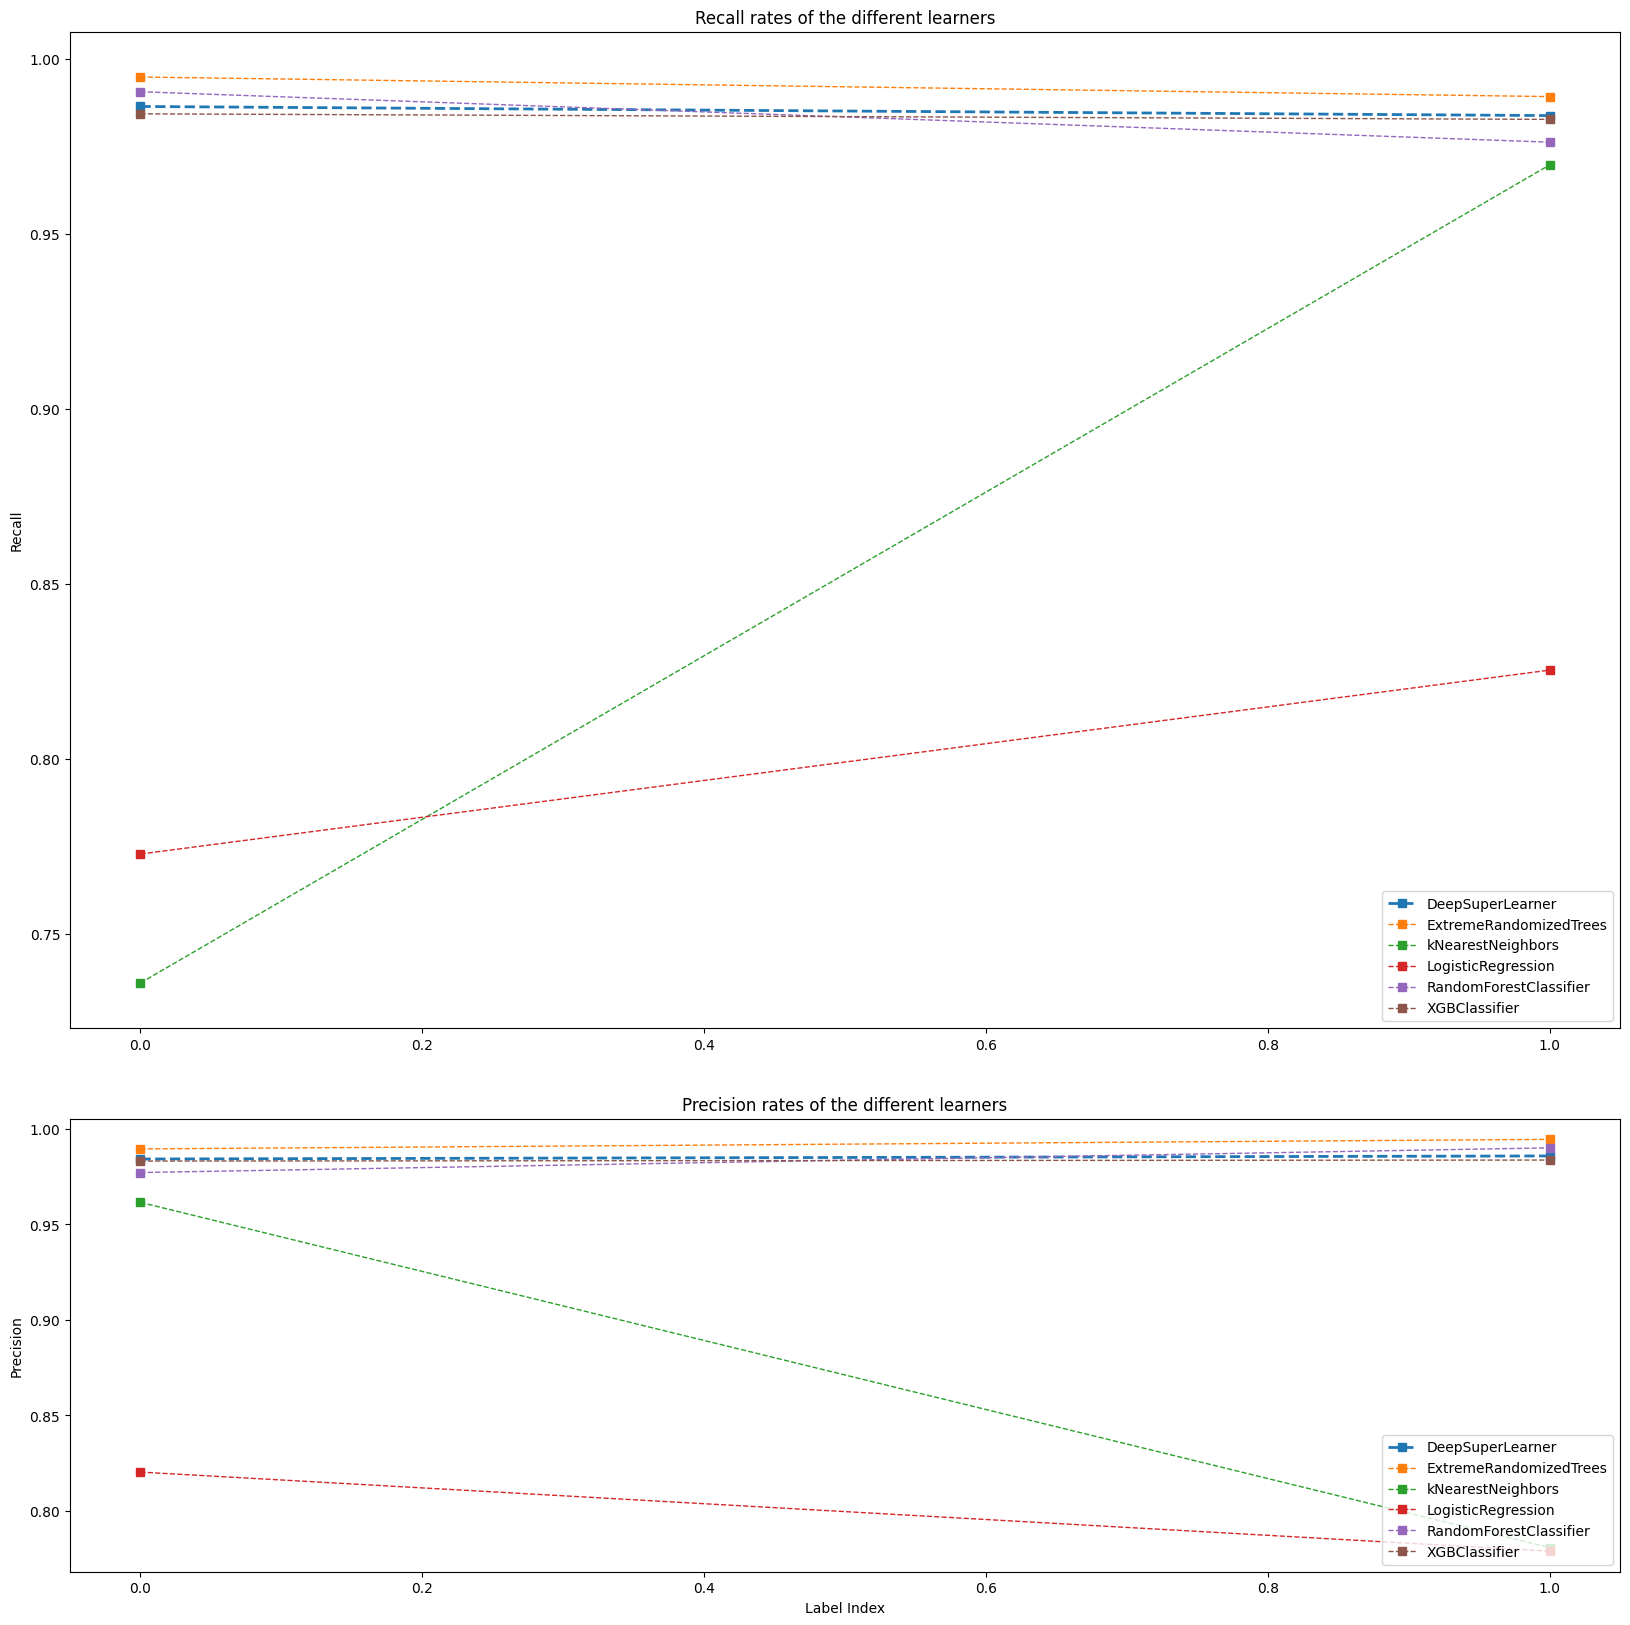

(array([0.98633018, 0.98373102]),
 array([0.98426023, 0.98586957]),
 [array([0.99474238, 0.98915401]),
  array([0.7360673 , 0.96963124]),
  array([0.77287066, 0.82537961]),
  array([0.99053628, 0.97613883]),
  array([0.98422713, 0.98264642])],
 [array([0.98953975, 0.99454744]),
  array([0.96153846, 0.78078603]),
  array([0.8203125 , 0.77891505]),
  array([0.97717842, 0.99009901]),
  array([0.98319328, 0.98371336])])

In [ ]:
ERT_learner = ExtraTreesClassifier(n_estimators=200, max_depth=None, max_features=1)
kNN_learner = KNeighborsClassifier(n_neighbors=11)
LR_learner = LogisticRegression()
RFC_learner = RandomForestClassifier(n_estimators=200, max_depth=None)
XGB_learner = XGBClassifier(n_estimators=200, max_depth=3, learning_rate=1.)
Base_learners = {'ExtremeRandomizedTrees':ERT_learner, 'kNearestNeighbors':kNN_learner, 'LogisticRegression':LR_learner, 'RandomForestClassifier':RFC_learner, 'XGBClassifier':XGB_learner}
np.random.seed(100)
#X, y = datasets.make_classification(n_samples=1000, n_features=12,n_informative=2, n_redundant=6)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
DSL_learner = DeepSuperLearner(Base_learners)
DSL_learner.fit(np.array(X_train), np.array(y_train), max_iterations=1)
DSL_learner.get_precision_recall(X_test, y_test, show_graphs=True)

In [ ]:
trainpredictions = DSL_learner.predict(X_train)
predictions = DSL_learner.predict(X_test)
trainprediction = np.argmax(trainpredictions, axis=1)
prediction = np.argmax(predictions, axis=1)
trainaccuracy_DSL = accuracy_score(y_train, trainprediction)
testaccuracy_DSL = accuracy_score(y_test, prediction)
precision_DSL=precision_score(y_test, prediction, average='macro')
recall_DSL=recall_score(y_test, prediction, average='macro')
f1_score_DSL=f1_score(y_test, prediction, average='macro')
roc_auc_DSL=roc_auc_score(y_test, prediction)
matthews_corrcoef_DSL=metrics.matthews_corrcoef(y_test, prediction)
df2={'Model' :'DSL','Train Accuracy':trainaccuracy_DSL,'Test Accuracy':testaccuracy_DSL,'Precision':precision_DSL,'Recall':recall_DSL,'F1 Score':f1_score_DSL,'AUC Score':roc_auc_DSL,'MCC':matthews_corrcoef_DSL}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature nam

In [ ]:
import os
import glob
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap
from matplotlib.colorbar import ColorbarBase

# Scipy
from scipy import interpolate
from scipy import spatial
from scipy import stats
from scipy.cluster import hierarchy
# Others
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import pickle
from math import modf

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import xgboost as xgb
from sklearn.linear_model import SGDClassifier

sns.set(style='white', context='notebook', palette='deep')
from sklearn.model_selection import train_test_split, KFold, cross_validate

#Models
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.exceptions import ConvergenceWarning

pd.options.display.float_format = '{:.5f}'.format
import numpy as np
import matplotlib.pyplot as plt
plt.style.context('seaborn-talk')
plt.style.use('fivethirtyeight')
params = {'legend.fontsize': '16',
          'figure.figsize': (15, 5),
         'axes.labelsize': '20',
         'axes.titlesize':'30',
         'xtick.labelsize':'18',
         'ytick.labelsize':'18'}
plt.rcParams.update(params)

plt.rcParams['text.color'] = '#A04000'
plt.rcParams['xtick.color'] = '#283747'
plt.rcParams['ytick.color'] = '#808000'
plt.rcParams['axes.labelcolor'] = '#283747'

# Seaborn style (figures)
sns.set(context='notebook', style='whitegrid')
sns.set_style('ticks', {'xtick.direction':'in', 'ytick.direction':'in'})
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn import model_selection
from sklearn.metrics import average_precision_score

In [ ]:
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1 = []
models = ["Naive Bayes","Logistic Regression","Decision Tree","RandomForest", "AdaBoost", "ExtraTrees","GradientBoosting","XGboost"]
roc = []
mathew = []
random_state = 2
classifiers = []
classifiers.append(BernoulliNB())
classifiers.append(LogisticRegression())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier(random_state=random_state, max_depth = 10, max_features = 'sqrt', n_estimators=  300))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.5))
classifiers.append(ExtraTreesClassifier(random_state=random_state, criterion ='entropy', max_features = 'sqrt', min_samples_leaf = 20, min_samples_split = 15))
classifiers.append(GradientBoostingClassifier(random_state=random_state, learning_rate = 0.2, max_depth = 10, n_estimators = 200))
classifiers.append(XGBClassifier(random_state = random_state))



for classifier,model in zip(classifiers, models):
    print('='*len(model))
    print(model)
    print('='*len(model))
    classifier.fit(X_train, y_train)
    trainprediction = classifier.predict(X_train)
    prediction = classifier.predict(X_test)
    trainaccuracy = accuracy_score(y_train, trainprediction)
    testaccuracy = accuracy_score(y_test, prediction)
    train_accuracy.append(trainaccuracy)
    test_accuracy.append(testaccuracy)
    precision.append(precision_score(y_test, prediction, average='macro'))
    recall.append(recall_score(y_test, prediction, average='macro'))
    f1.append(f1_score(y_test, prediction, average='macro'))
    roc.append(metrics.roc_auc_score(y_test, prediction))

    mathew.append(metrics.matthews_corrcoef(y_test, prediction))

    print('\n clasification report:\n', classification_report(y_test,prediction))
    print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
    print('\n')

scoreDF = pd.DataFrame({'Model' : models})
scoreDF['Train Accuracy'] = train_accuracy
scoreDF['Test Accuracy'] = test_accuracy
scoreDF['Precision'] =  precision
scoreDF['Recall'] =  recall
scoreDF['F1 Score'] = f1
scoreDF['AUC Score'] = roc
scoreDF['MCC'] = mathew



scoreDF.set_index("Model")

Naive Bayes


BernoulliNB()


 clasification report:
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       951
         1.0       0.80      0.79      0.79       922

    accuracy                           0.80      1873
   macro avg       0.80      0.80      0.80      1873
weighted avg       0.80      0.80      0.80      1873


 confussion matrix:
 [[764 187]
 [193 729]]


Logistic Regression


LogisticRegression()


 clasification report:
               precision    recall  f1-score   support

         0.0       0.82      0.77      0.80       951
         1.0       0.78      0.83      0.80       922

    accuracy                           0.80      1873
   macro avg       0.80      0.80      0.80      1873
weighted avg       0.80      0.80      0.80      1873


 confussion matrix:
 [[734 217]
 [156 766]]


Decision Tree


DecisionTreeClassifier()


 clasification report:
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       951
         1.0       0.97      0.98      0.97       922

    accuracy                           0.97      1873
   macro avg       0.97      0.97      0.97      1873
weighted avg       0.97      0.97      0.97      1873


 confussion matrix:
 [[919  32]
 [ 21 901]]


RandomForest


RandomForestClassifier(max_depth=10, n_estimators=300, random_state=2)


 clasification report:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       951
         1.0       0.97      0.96      0.97       922

    accuracy                           0.97      1873
   macro avg       0.97      0.97      0.97      1873
weighted avg       0.97      0.97      0.97      1873


 confussion matrix:
 [[928  23]
 [ 38 884]]


AdaBoost


AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=2),
                   learning_rate=0.5, random_state=2)


 clasification report:
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       951
         1.0       0.97      0.97      0.97       922

    accuracy                           0.97      1873
   macro avg       0.97      0.97      0.97      1873
weighted avg       0.97      0.97      0.97      1873


 confussion matrix:
 [[924  27]
 [ 24 898]]


ExtraTrees


ExtraTreesClassifier(criterion='entropy', min_samples_leaf=20,
                     min_samples_split=15, random_state=2)


 clasification report:
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       951
         1.0       0.90      0.90      0.90       922

    accuracy                           0.90      1873
   macro avg       0.90      0.90      0.90      1873
weighted avg       0.90      0.90      0.90      1873


 confussion matrix:
 [[859  92]
 [ 94 828]]


GradientBoosting


GradientBoostingClassifier(learning_rate=0.2, max_depth=10, n_estimators=200,
                           random_state=2)


 clasification report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       951
         1.0       0.99      0.99      0.99       922

    accuracy                           0.99      1873
   macro avg       0.99      0.99      0.99      1873
weighted avg       0.99      0.99      0.99      1873


 confussion matrix:
 [[943   8]
 [  8 914]]


XGboost


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)


 clasification report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       951
         1.0       0.98      0.99      0.99       922

    accuracy                           0.99      1873
   macro avg       0.99      0.99      0.99      1873
weighted avg       0.99      0.99      0.99      1873


 confussion matrix:
 [[935  16]
 [ 10 912]]




,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC Score,MCC
Model,,,,,,,
Naive Bayes,0.81872,0.79712,0.79709,0.79702,0.79705,0.79702,0.59411
Logistic Regression,0.81498,0.80085,0.80198,0.80131,0.80080,0.80131,0.60329
Decision Tree,1.00000,0.97170,0.97168,0.97179,0.97170,0.97179,0.94347
RandomForest,0.98345,0.96743,0.96765,0.96730,0.96741,0.96730,0.93495
AdaBoost,1.00000,0.97277,0.97275,0.97279,0.97277,0.97279,0.94554
ExtraTrees,0.92217,0.90069,0.90068,0.90065,0.90067,0.90065,0.80134
GradientBoosting,1.00000,0.99146,0.99146,0.99146,0.99146,0.99146,0.98291
XGboost,1.00000,0.98612,0.98609,0.98616,0.98612,0.98616,0.97225


In [ ]:
scoreDF

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC Score,MCC
0,Naive Bayes,0.81872,0.79712,0.79709,0.79702,0.79705,0.79702,0.59411
1,Logistic Regression,0.81498,0.80085,0.80198,0.80131,0.80080,0.80131,0.60329
2,Decision Tree,1.00000,0.97170,0.97168,0.97179,0.97170,0.97179,0.94347
3,RandomForest,0.98345,0.96743,0.96765,0.96730,0.96741,0.96730,0.93495
4,AdaBoost,1.00000,0.97277,0.97275,0.97279,0.97277,0.97279,0.94554
5,ExtraTrees,0.92217,0.90069,0.90068,0.90065,0.90067,0.90065,0.80134
6,GradientBoosting,1.00000,0.99146,0.99146,0.99146,0.99146,0.99146,0.98291
7,XGboost,1.00000,0.98612,0.98609,0.98616,0.98612,0.98616,0.97225


In [ ]:
random_state = 123
LR = LogisticRegression(random_state = random_state, n_jobs=-1)
NB = BernoulliNB()
KNN = KNeighborsClassifier(n_jobs=-1)
DT = DecisionTreeClassifier(random_state=random_state)
RF = RandomForestClassifier(random_state=random_state)
BG = BaggingClassifier()
XGB = XGBClassifier()
ADA = AdaBoostClassifier()
GBM = GradientBoostingClassifier()
ET = ExtraTreesClassifier()


LR.fit(X_train, y_train)
NB.fit(X_train, y_train)
RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)
BG.fit(X_train, y_train)
XGB.fit(X_train, y_train)
ADA.fit(X_train, y_train)
GBM.fit(X_train, y_train)
ET.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
NB_pred = NB.predict(X_test)
RF_pred = RF.predict(X_test)
KNN_pred = KNN.predict(X_test)
DT_pred = DT.predict(X_test)
BG_pred = BG.predict(X_test)
ADA_pred = BG.predict(X_test)
XGB_pred = BG.predict(X_test)
ET_pred = BG.predict(X_test)
GBM_pred = BG.predict(X_test)

LogisticRegression(n_jobs=-1, random_state=123)

BernoulliNB()

RandomForestClassifier(random_state=123)

KNeighborsClassifier(n_jobs=-1)

DecisionTreeClassifier(random_state=123)

BaggingClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

AdaBoostClassifier()

GradientBoostingClassifier()

ExtraTreesClassifier()

In [ ]:
averaged_preds = (LR_pred + NB_pred + RF_pred + KNN_pred + DT_pred + BG_pred + ADA_pred +XGB_pred + ET_pred + GBM_pred)//10
acc = accuracy_score(y_test, averaged_preds)
print('\n Accuracy Score:\n', np.round(acc, 3))

print('\n clasification report:\n', classification_report(y_test,averaged_preds))
print('\n confussion matrix:\n', metrics.confusion_matrix(y_test, averaged_preds))

print('\n')


 Accuracy Score:
 0.851

 clasification report:
               precision    recall  f1-score   support

         0.0       0.77      1.00      0.87       951
         1.0       1.00      0.70      0.82       922

    accuracy                           0.85      1873
   macro avg       0.88      0.85      0.85      1873
weighted avg       0.88      0.85      0.85      1873


 confussion matrix:
 [[948   3]
 [276 646]]





 Accuracy Score:
 0.984


<Axes: >


 clasification report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       951
         1.0       0.99      0.98      0.98       922

    accuracy                           0.98      1873
   macro avg       0.98      0.98      0.98      1873
weighted avg       0.98      0.98      0.98      1873



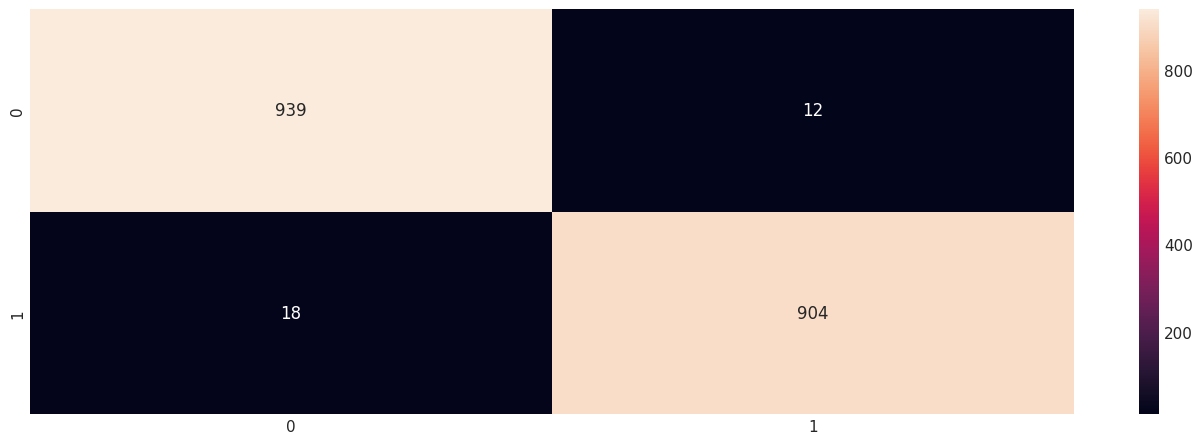

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC Score,MCC
0,Naive Bayes,0.81872,0.79712,0.79709,0.79702,0.79705,0.79702,0.59411
1,Logistic Regression,0.81498,0.80085,0.80198,0.80131,0.80080,0.80131,0.60329
2,Decision Tree,1.00000,0.97170,0.97168,0.97179,0.97170,0.97179,0.94347
3,RandomForest,0.98345,0.96743,0.96765,0.96730,0.96741,0.96730,0.93495
4,AdaBoost,1.00000,0.97277,0.97275,0.97279,0.97277,0.97279,0.94554
5,ExtraTrees,0.92217,0.90069,0.90068,0.90065,0.90067,0.90065,0.80134
6,GradientBoosting,1.00000,0.99146,0.99146,0.99146,0.99146,0.99146,0.98291
7,XGboost,1.00000,0.98612,0.98609,0.98616,0.98612,0.98616,0.97225
8,Stack Ensemble (Hard Voting)\t,0.99960,0.98398,0.98405,0.98393,0.98398,0.98393,0.96797


In [ ]:
ensemble = VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(random_state = random_state)),
                                              ('Naive Bayes', GaussianNB()),
                                              ('RF', RandomForestClassifier(random_state=random_state)),
                                              ('KNN', KNeighborsClassifier()),
                                              ('Decision Tree', DecisionTreeClassifier(random_state=random_state)),
                                       ('Bagging Classifier', BaggingClassifier(random_state = random_state)),
                                              ('GBM', GradientBoostingClassifier()),
                                              ('ADA', AdaBoostClassifier(random_state=random_state)),
                                              ('ET', ExtraTreesClassifier()),
                                              ('XGB', XGBClassifier(random_state=random_state))



                                       ],
                                               voting='hard').fit(X_train,y_train)


trainprediction = ensemble.predict(X_train)
prediction = ensemble.predict(X_test)
trainaccuracy_HV = accuracy_score(y_train, trainprediction)
testaccuracy_HV = accuracy_score(y_test, prediction)
precision_HV=precision_score(y_test, prediction, average='macro')
recall_HV=recall_score(y_test, prediction, average='macro')
f1_score_HV=f1_score(y_test, prediction, average='macro')
roc_auc_HV=roc_auc_score(y_test, prediction)
matthews_corrcoef_HV=metrics.matthews_corrcoef(y_test, prediction)
df_HV={'Model' :'Stack Ensemble (Hard Voting)	','Train Accuracy':trainaccuracy_HV,'Test Accuracy':testaccuracy_HV,'Precision':precision_HV,'Recall':recall_HV,'F1 Score':f1_score_HV,'AUC Score':roc_auc_HV,'MCC':matthews_corrcoef_HV}


print('\n Accuracy Score:\n', np.round(accuracy_score(y_test, prediction), 3))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,fmt='2.0f')
print('\n clasification report:\n', classification_report(y_test,prediction))

plt.show()
scoreDF = scoreDF.append(df_HV, ignore_index = True)
scoreDF


 Accuracy Score:
 0.985


<Axes: >


 clasification report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       951
         1.0       0.98      0.99      0.98       922

    accuracy                           0.99      1873
   macro avg       0.99      0.99      0.99      1873
weighted avg       0.99      0.99      0.99      1873



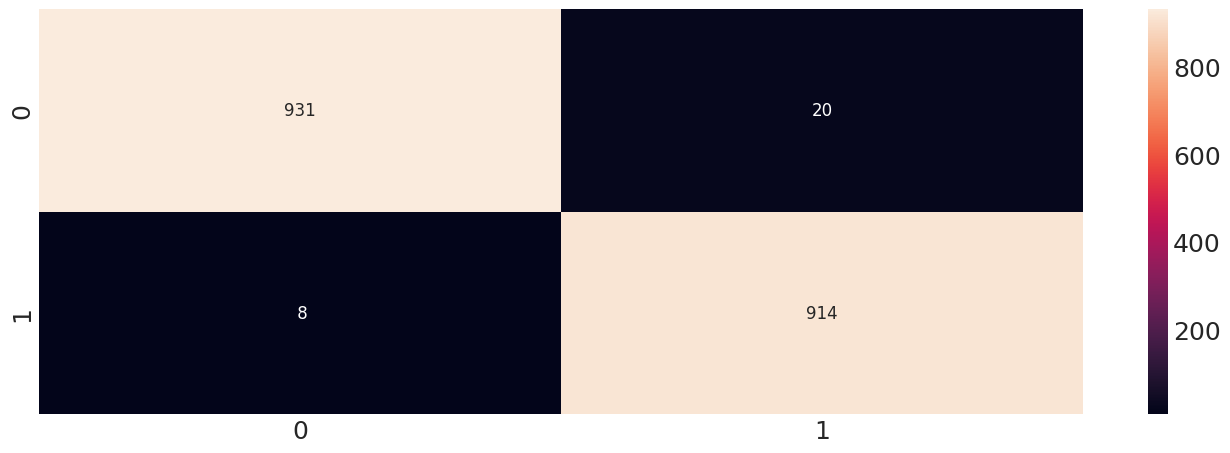

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC Score,MCC
Model,,,,,,,
Naive Bayes,0.81872,0.79712,0.79709,0.79702,0.79705,0.79702,0.59411
Logistic Regression,0.81498,0.80085,0.80198,0.80131,0.80080,0.80131,0.60329
Decision Tree,1.00000,0.97170,0.97168,0.97179,0.97170,0.97179,0.94347
RandomForest,0.98345,0.96743,0.96765,0.96730,0.96741,0.96730,0.93495
AdaBoost,1.00000,0.97277,0.97275,0.97279,0.97277,0.97279,0.94554
ExtraTrees,0.92217,0.90069,0.90068,0.90065,0.90067,0.90065,0.80134
GradientBoosting,1.00000,0.99146,0.99146,0.99146,0.99146,0.99146,0.98291
XGboost,1.00000,0.98612,0.98609,0.98616,0.98612,0.98616,0.97225
Stack Ensemble (Hard Voting),0.99960,0.98398,0.98405,0.98393,0.98398,0.98393,0.96797


In [ ]:
ensemble1 = VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(random_state = random_state)),
                                              ('Naive Bayes', GaussianNB()),
                                              ('RF', RandomForestClassifier(random_state=random_state)),
                                              ('KNN', KNeighborsClassifier()),
                                              ('Decision Tree', DecisionTreeClassifier(random_state=random_state)),
                                       ('Bagging Classifier', BaggingClassifier(random_state = random_state)),
                                              ('GBM', GradientBoostingClassifier()),
                                              ('ADA', AdaBoostClassifier(random_state=random_state)),
                                              ('ET', ExtraTreesClassifier()),
                                              ('XGB', XGBClassifier(random_state=random_state))



                                       ],
                                               voting='soft').fit(X_train,y_train)

trainprediction = ensemble1.predict(X_train)
prediction = ensemble1.predict(X_test)
trainaccuracy_SV = accuracy_score(y_train, trainprediction)
testaccuracy_SV = accuracy_score(y_test, prediction)
precision_SV=precision_score(y_test, prediction, average='macro')
recall_SV=recall_score(y_test, prediction, average='macro')
f1_score_SV=f1_score(y_test, prediction, average='macro')
roc_auc_SV=roc_auc_score(y_test, prediction)
matthews_corrcoef_SV=metrics.matthews_corrcoef(y_test, prediction)
df_SV={'Model' :'Stack Ensemble (Soft Voting)	','Train Accuracy':trainaccuracy_SV,'Test Accuracy':testaccuracy_SV,'Precision':precision_SV,'Recall':recall_SV,'F1 Score':f1_score_SV,'AUC Score':roc_auc_SV,'MCC':matthews_corrcoef_SV}


print('\n Accuracy Score:\n', np.round(accuracy_score(y_test, prediction), 3))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,fmt='2.0f')
print('\n clasification report:\n', classification_report(y_test,prediction))

plt.show()
scoreDF = scoreDF.append(df_SV, ignore_index = True)
scoreDF

In [ ]:
scoreDF = scoreDF.append(df2, ignore_index = True)
scoreDF

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC Score,MCC
0,Naive Bayes,0.81872,0.79712,0.79709,0.79702,0.79705,0.79702,0.59411
1,Logistic Regression,0.81498,0.80085,0.80198,0.80131,0.80080,0.80131,0.60329
2,Decision Tree,1.00000,0.97170,0.97168,0.97179,0.97170,0.97179,0.94347
3,RandomForest,0.98345,0.96743,0.96765,0.96730,0.96741,0.96730,0.93495
4,AdaBoost,1.00000,0.97277,0.97275,0.97279,0.97277,0.97279,0.94554
5,ExtraTrees,0.92217,0.90069,0.90068,0.90065,0.90067,0.90065,0.80134
6,GradientBoosting,1.00000,0.99146,0.99146,0.99146,0.99146,0.99146,0.98291
7,XGboost,1.00000,0.98612,0.98609,0.98616,0.98612,0.98616,0.97225
8,Stack Ensemble (Hard Voting)\t,0.99960,0.98398,0.98405,0.98393,0.98398,0.98393,0.96797
9,Stack Ensemble (Hard Voting)\t,1.00000,0.98558,0.98555,0.98564,0.98558,0.98564,0.97119


h20


In [ ]:
!pip install h2o
import h2o
from h2o.estimators import H2OGradientBoostingEstimator

# Initialize H2O
h2o.init()
train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Identify predictors and response
x = train.columns[:-1]  # Features
y = train.columns[-1]   # Target variable

# Train a model (e.g., Gradient Boosting)
model1 = H2OGradientBoostingEstimator()
model1.train(x=x, y=y, training_frame=train)

# Make predictions on test set
predictions = model1.predict(test)
predictions = predictions['predict'].as_data_frame()
# Assuming 'predictions' contains continuous probability values between 0 and 1
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

testaccuracy_H2O = accuracy_score(y_test, binary_predictions)
precision_H2O=precision_score(y_test, binary_predictions, average='macro')
recall_H2O=recall_score(y_test, binary_predictions, average='macro')
f1_score_H2O=f1_score(y_test, binary_predictions, average='macro')
roc_auc_H2O=metrics.roc_auc_score(y_test, binary_predictions)
matthews_corrcoef_H2O=metrics.matthews_corrcoef(y_test, binary_predictions)

dfh20={'Model' :'H2O','Train Accuracy':1,'Test Accuracy':testaccuracy_H2O,'Precision':precision_H2O,'Recall':recall_H2O,'F1 Score':f1_score_H2O,'AUC Score':roc_auc_H2O,'MCC':matthews_corrcoef_H2O}
scoreDF = scoreDF.append(dfh20, ignore_index = True)
scoreDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=118cf9826032af58850033bb6d047ad4839b36592eddfe015f6138e2b0a783cf
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_a5k1w60
  JVM stdout: /tmp/tmp_a5k1w60/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_a5k1w60/h2o_unknownUser_s

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_ate6z8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1699162284462_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          20428                  5            5            5             14            32            27.84

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.04174776981190262
RMSE: 0.2043227099759168
MAE: 0.129898779123731
RMSLE: 0.144353120173016
Mean Residual Deviance: 0.04174776981190262

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  --------------------
     2023-11-05 05:31:36  0.453 sec   0.0                0.4999962532213595   0.49999250647076504  0.24999625323539781
     2023-11-05 05:31:37  1.417 sec   1.0                0.46831627996900743  0.4677018588979482   0.21932013808400977
     2023-11-05 05:31:37  1.722 sec   2.0                0.4407084390934684   0.43854365421939223  0.19422392828820137
     2023-11-05 05:31:37  1.935 sec   3.0                0.4171499266819213   0.41270095834409326  0.17401406133073233
     2023-11-05 05:31:37  2.112 sec   4.0                0.3964700504822543   0.3890327368443328   0.1571885009294013
     2023-11-05 05:31:37  2.195 sec   5.0                0.3782745435694463   0.3676739978290594   0.1430916303126729
     2023-11-05 05:31:37  2.318 sec   6.0                0.36254042123949337  0.348181733153656    0.13143555703250928
     2023-11-05 05:31:38  2.418 sec   7.0                0.34757461530968253  0.3294696174298407   0.12080811320767382
     2023-11-05 05:31:38  2.528 sec   8.0                0.33409952755467853  0.3125938577854718   0.11162249431225939
     2023-11-05 05:31:38  2.618 sec   9.0                0.32371832094686354  0.29832744268378975  0.10479355131665656
---  ---                  ---         ---                ---                  ---                  ---
     2023-11-05 05:31:39  3.982 sec   26.0               0.23605321720362613  0.16441599024936385  0.05572112135218229
     2023-11-05 05:31:39  4.058 sec   27.0               0.23449072615774352  0.16164783186247783  0.05498590065398586
     2023-11-05 05:31:39  4.135 sec   28.0               0.23238343337568546  0.15820931723922443  0.05400206010747164
     2023-11-05 05:31:39  4.203 sec   29.0               0.23060765046268014  0.15532500022447784  0.05317988845191766
     2023-11-05 05:31:39  4.293 sec   30.0               0.2284011353168087   0.15251568462365217  0.052167078614007156
     2023-11-05 05:31:40  4.370 sec   31.0               0.22665702882463618  0.15012286056750998  0.051373408715611954
     2023-11-05 05:31:40  4.465 sec   32.0               0.22453126083671507  0.1477399728771415   0.05041428709292498
     2023-11-05 05:31:40  4.564 sec   33.0               0.2236005263012466   0.14647325352617238  0.04999719536219448
     2023-11-05 05:31:40  4.631 sec   34.0               0.22190022152142275  0.14465129380656902  0.04923970831125649
     2023-11-05 05:31:41  5.739 sec   50.0               0.2043227099759168   0.129898779123731    0.04174776981190262
[36 rows x 7 columns]


Variable Importances: 
variable                               relative_importance    scaled_importance      percentage
-------------------------------------  ---------------------  ---------------------  ----------------------
Tenure                                 3236.696044921875      1.0                    0.3919463073232035
Complain                               1532.2349853515625     0.4733947717319704     0.185545332686

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC Score,MCC
0,Naive Bayes,0.81872,0.79712,0.79709,0.79702,0.79705,0.79702,0.59411
1,Logistic Regression,0.81498,0.80085,0.80198,0.80131,0.80080,0.80131,0.60329
2,Decision Tree,1.00000,0.97170,0.97168,0.97179,0.97170,0.97179,0.94347
3,RandomForest,0.98345,0.96743,0.96765,0.96730,0.96741,0.96730,0.93495
4,AdaBoost,1.00000,0.97277,0.97275,0.97279,0.97277,0.97279,0.94554
5,ExtraTrees,0.92217,0.90069,0.90068,0.90065,0.90067,0.90065,0.80134
6,GradientBoosting,1.00000,0.99146,0.99146,0.99146,0.99146,0.99146,0.98291
7,XGboost,1.00000,0.98612,0.98609,0.98616,0.98612,0.98616,0.97225
8,Stack Ensemble (Hard Voting)\t,0.99960,0.98398,0.98405,0.98393,0.98398,0.98393,0.96797
9,Stack Ensemble (Hard Voting)\t,1.00000,0.98558,0.98555,0.98564,0.98558,0.98564,0.97119


**TPOT**

In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=77f2bf0c93c76fe092b481fc86aaee5c3a790d348021e7bf8adeb8d41d196b9a
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_digits_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9821121513140492

Generation 2 - Current best internal CV score: 0.9821121513140492

Generation 3 - Current best internal CV score: 0.9821121513140492

Generation 4 - Current best internal CV score: 0.9821121513140492

Generation 5 - Current best internal CV score: 0.983313931584118

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=10, max_features=0.35000000000000003, min_samples_leaf=2, min_samples_split=3, n_estimators=100, subsample=0.7500000000000001)


TPOTClassifier(generations=5, population_size=50, random_state=42, verbosity=2)

0.9887880405766151


In [ ]:
scoreDF1=scoreDF.copy()

In [ ]:
trainprediction = tpot.predict(X_train)
prediction = tpot.predict(X_test)
trainaccuracy_TPOT = accuracy_score(y_train, trainprediction)
testaccuracy_TPOT = accuracy_score(y_test, prediction)
precision_TPOT=precision_score(y_test, prediction, average='macro')
recall_TPOT=recall_score(y_test, prediction, average='macro')
f1_score_TPOT=f1_score(y_test, prediction, average='macro')
roc_auc_TPOT=metrics.roc_auc_score(y_test, prediction)
matthews_corrcoef_TPOT=metrics.matthews_corrcoef(y_test, prediction)

In [ ]:
print(trainaccuracy_TPOT,',',testaccuracy_TPOT,',',precision_TPOT,',',recall_TPOT,',',f1_score_TPOT,',',roc_auc_TPOT,',',matthews_corrcoef_TPOT)

1.0 , 0.9887880405766151 , 0.988814065055673 , 0.9887605466103724 , 0.988784766923146 , 0.9887605466103724 , 0.977574610201081


In [ ]:
df3={'Model' :'TPOT','Train Accuracy':trainaccuracy_TPOT,'Test Accuracy':testaccuracy_TPOT,'Precision':precision_TPOT,'Recall':recall_TPOT,'F1 Score':f1_score_TPOT,'AUC Score':roc_auc_TPOT,'MCC':matthews_corrcoef_TPOT}


In [ ]:
scoreDF = scoreDF.append(df3, ignore_index = True)
scoreDF

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC Score,MCC
0,Naive Bayes,0.81872,0.79712,0.79709,0.79702,0.79705,0.79702,0.59411
1,Logistic Regression,0.81498,0.80085,0.80198,0.80131,0.80080,0.80131,0.60329
2,Decision Tree,1.00000,0.97170,0.97168,0.97179,0.97170,0.97179,0.94347
3,RandomForest,0.98345,0.96743,0.96765,0.96730,0.96741,0.96730,0.93495
4,AdaBoost,1.00000,0.97277,0.97275,0.97279,0.97277,0.97279,0.94554
5,ExtraTrees,0.92217,0.90069,0.90068,0.90065,0.90067,0.90065,0.80134
6,GradientBoosting,1.00000,0.99146,0.99146,0.99146,0.99146,0.99146,0.98291
7,XGboost,1.00000,0.98612,0.98609,0.98616,0.98612,0.98616,0.97225
8,Stack Ensemble (Hard Voting)\t,0.99960,0.98398,0.98405,0.98393,0.98398,0.98393,0.96797
9,Stack Ensemble (Hard Voting)\t,1.00000,0.98558,0.98555,0.98564,0.98558,0.98564,0.97119


In [ ]:
scoreDF3=scoreDF2.copy()

In [ ]:
scoreDF1

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC Score,MCC
0,Naive Bayes,0.81872,0.79712,0.79709,0.79702,0.79705,0.79702,0.59411
1,Logistic Regression,0.81498,0.80085,0.80198,0.80131,0.80080,0.80131,0.60329
2,Decision Tree,1.00000,0.97170,0.97168,0.97179,0.97170,0.97179,0.94347
3,RandomForest,0.98345,0.96743,0.96765,0.96730,0.96741,0.96730,0.93495
4,AdaBoost,1.00000,0.97277,0.97275,0.97279,0.97277,0.97279,0.94554
5,ExtraTrees,0.92217,0.90069,0.90068,0.90065,0.90067,0.90065,0.80134
6,GradientBoosting,1.00000,0.99146,0.99146,0.99146,0.99146,0.99146,0.98291
7,XGboost,1.00000,0.98612,0.98609,0.98616,0.98612,0.98616,0.97225
8,Stack Ensemble (Hard Voting)\t,0.99960,0.98398,0.98405,0.98393,0.98398,0.98393,0.96797
9,Stack Ensemble (Hard Voting)\t,1.00000,0.98558,0.98555,0.98564,0.98558,0.98564,0.97119


In [ ]:
dfen={'Model' :'ANN Ensemble Classifier','Train Accuracy':train_acc,'Test Accuracy':acc,'Precision':prec,'Recall':rec,'F1 Score':f1,'AUC Score':roc,'MCC':mathew}


In [ ]:

table=scoreDF2
table

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC Score,MCC
0,Naive Bayes,0.81872,0.79712,0.79709,0.79702,0.79705,0.79702,0.59411
1,Logistic Regression,0.81498,0.80085,0.80198,0.80131,0.80080,0.80131,0.60329
2,Decision Tree,1.00000,0.97170,0.97168,0.97179,0.97170,0.97179,0.94347
3,RandomForest,0.98345,0.96743,0.96765,0.96730,0.96741,0.96730,0.93495
4,AdaBoost,1.00000,0.97277,0.97275,0.97279,0.97277,0.97279,0.94554
5,ExtraTrees,0.92217,0.90069,0.90068,0.90065,0.90067,0.90065,0.80134
6,GradientBoosting,1.00000,0.99146,0.99146,0.99146,0.99146,0.99146,0.98291
7,XGboost,1.00000,0.98612,0.98609,0.98616,0.98612,0.98616,0.97225
8,Stack Ensemble (Hard Voting)\t,0.99960,0.98398,0.98405,0.98393,0.98398,0.98393,0.96797
9,Stack Ensemble (Hard Voting)\t,1.00000,0.98558,0.98555,0.98564,0.98558,0.98564,0.97119


from matplotlib import pyplot as plt
scoreDF2['Train Accuracy'].plot(kind='hist', bins=20, title='Train Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scoreDF2['Test Accuracy'].plot(kind='hist', bins=20, title='Test Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scoreDF2['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scoreDF2['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scoreDF2.plot(kind='scatter', x='Train Accuracy', y='Test Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scoreDF2.plot(kind='scatter', x='Test Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scoreDF2.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scoreDF2.plot(kind='scatter', x='Recall', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scoreDF2['Train Accuracy'].plot(kind='line', figsize=(8, 4), title='Train Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
scoreDF2['Test Accuracy'].plot(kind='line', figsize=(8, 4), title='Test Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
scoreDF2['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
scoreDF2['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
scoreDF

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC Score,MCC
0,Naive Bayes,0.81872,0.79712,0.79709,0.79702,0.79705,0.79702,0.59411
1,Logistic Regression,0.81498,0.80085,0.80198,0.80131,0.80080,0.80131,0.60329
2,Decision Tree,1.00000,0.97170,0.97168,0.97179,0.97170,0.97179,0.94347
3,RandomForest,0.98345,0.96743,0.96765,0.96730,0.96741,0.96730,0.93495
4,AdaBoost,1.00000,0.97277,0.97275,0.97279,0.97277,0.97279,0.94554
5,ExtraTrees,0.92217,0.90069,0.90068,0.90065,0.90067,0.90065,0.80134
6,GradientBoosting,1.00000,0.99146,0.99146,0.99146,0.99146,0.99146,0.98291
7,XGboost,1.00000,0.98612,0.98609,0.98616,0.98612,0.98616,0.97225
8,Stack Ensemble (Hard Voting),0.99960,0.98398,0.98405,0.98393,0.98398,0.98393,0.96797
9,Stack Ensemble (Soft Voting),1.00000,0.98558,0.98555,0.98564,0.98558,0.98564,0.97119


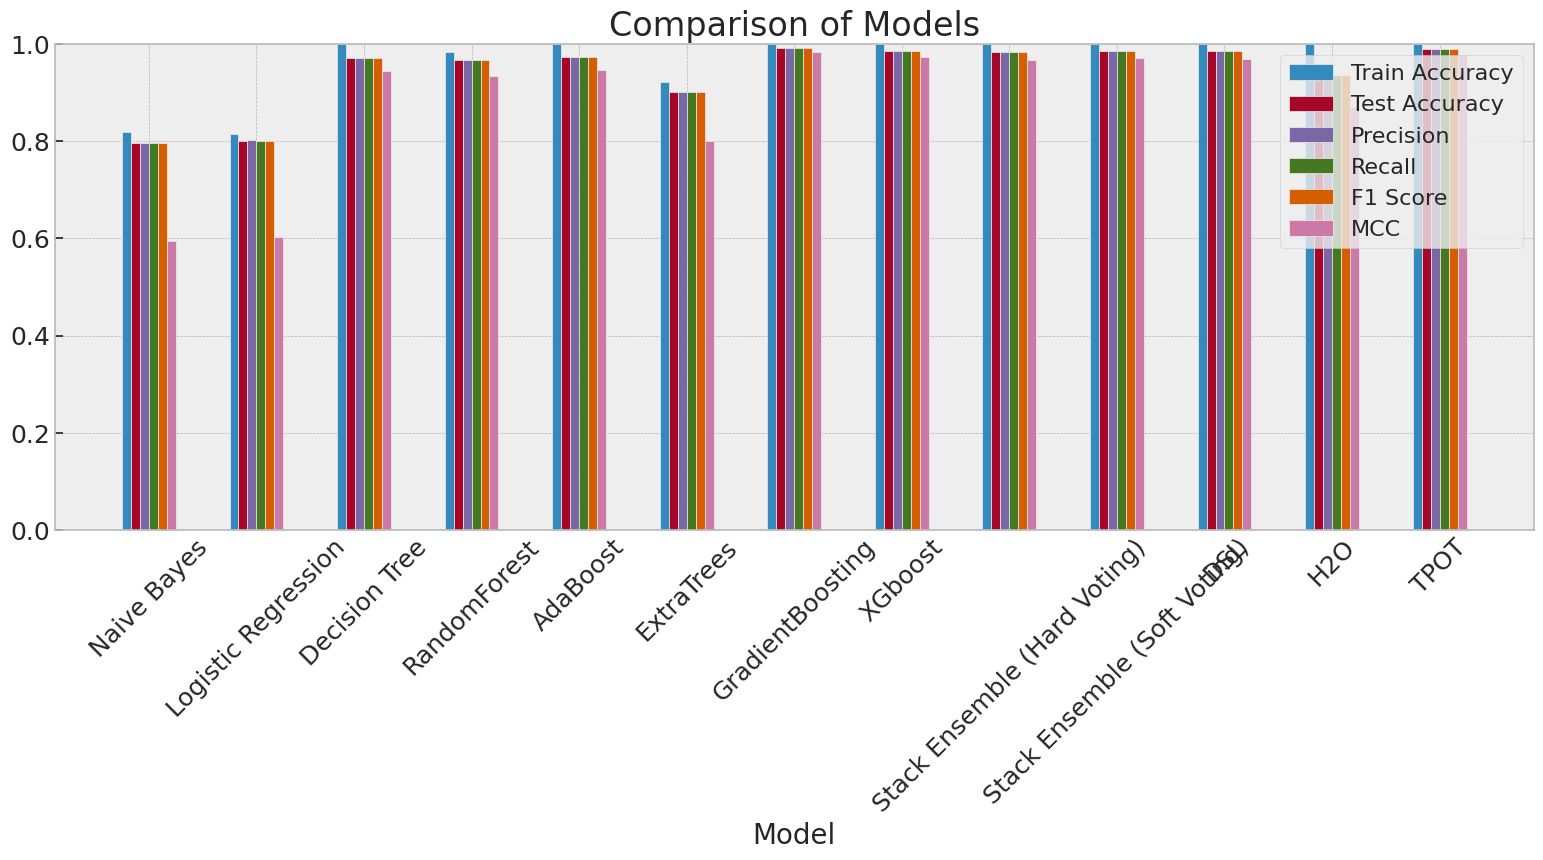

In [ ]:
plt.style.use('bmh')
params = {'legend.fontsize': '16',
          'figure.figsize': (15, 5),
         'axes.labelsize': '20',
         'axes.titlesize':'30',
         'xtick.labelsize':'18',
         'ytick.labelsize':'18'}
plt.rcParams.update(params)

def subcategorybar(X, vals, width=0.5):
    cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score', 'MCC']
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge")


    plt.xticks(_X, X)
models = ["Naive Bayes","Logistic Regression","Decision Tree","RandomForest", "AdaBoost", "ExtraTrees","GradientBoosting","XGboost","Stack Ensemble (Hard Voting)","Stack Ensemble (Soft Voting)","DSL","H2O","TPOT"]
plt.figure(figsize = (17,6))
subcategorybar(models, [scoreDF['Train Accuracy'], scoreDF['Test Accuracy'], scoreDF['Precision'], scoreDF['Recall'], scoreDF['F1 Score'], scoreDF['MCC']])
plt.ylim(0, 1.0)
cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score', 'MCC']
plt.legend(cols)
plt.xlabel('Model', fontsize = 20)
plt.xticks(rotation = 45)

plt.title("Comparison of Models", fontsize = 24)
plt.show();

In [ ]:
scoreDF = scoreDF.set_index("Model")

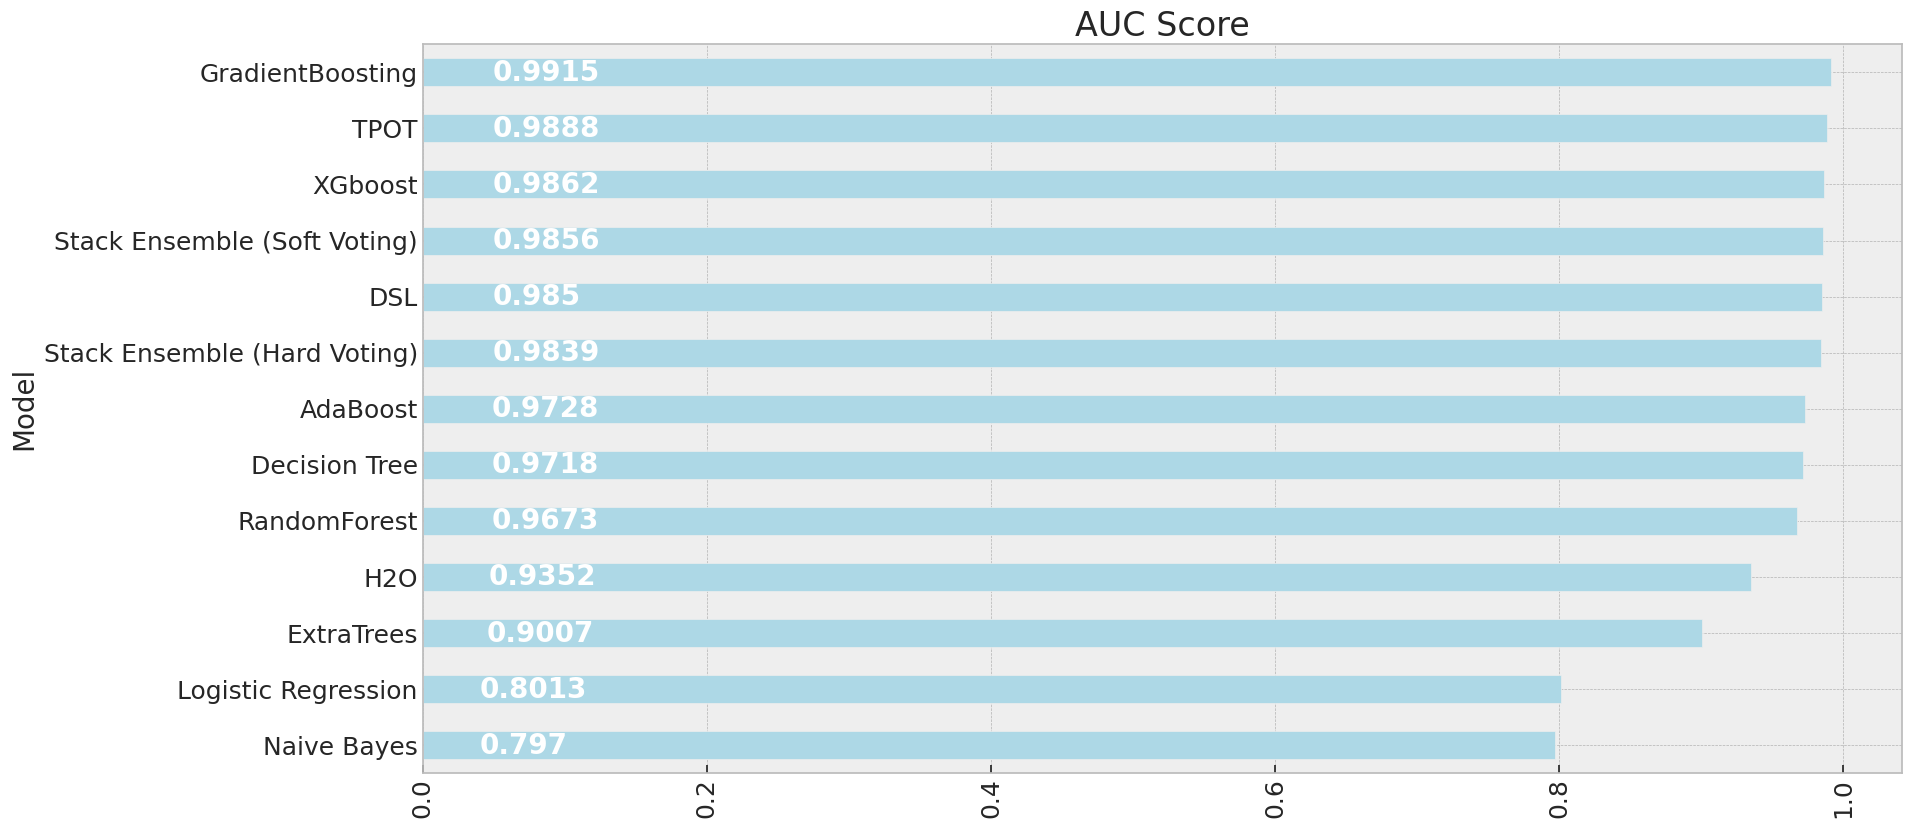

In [ ]:
ax = scoreDF['AUC Score'].sort_values().round(6).plot(kind = 'barh', color = 'lightblue', figsize = (17,9));
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()*0.05, i.get_y()+0.1, \
            str(round((i.get_width()), 4)), fontsize=20,
color='white', fontweight = 'bold')

plt.title('AUC Score', fontsize = 24)
plt.xticks(rotation = 90)
plt.show();



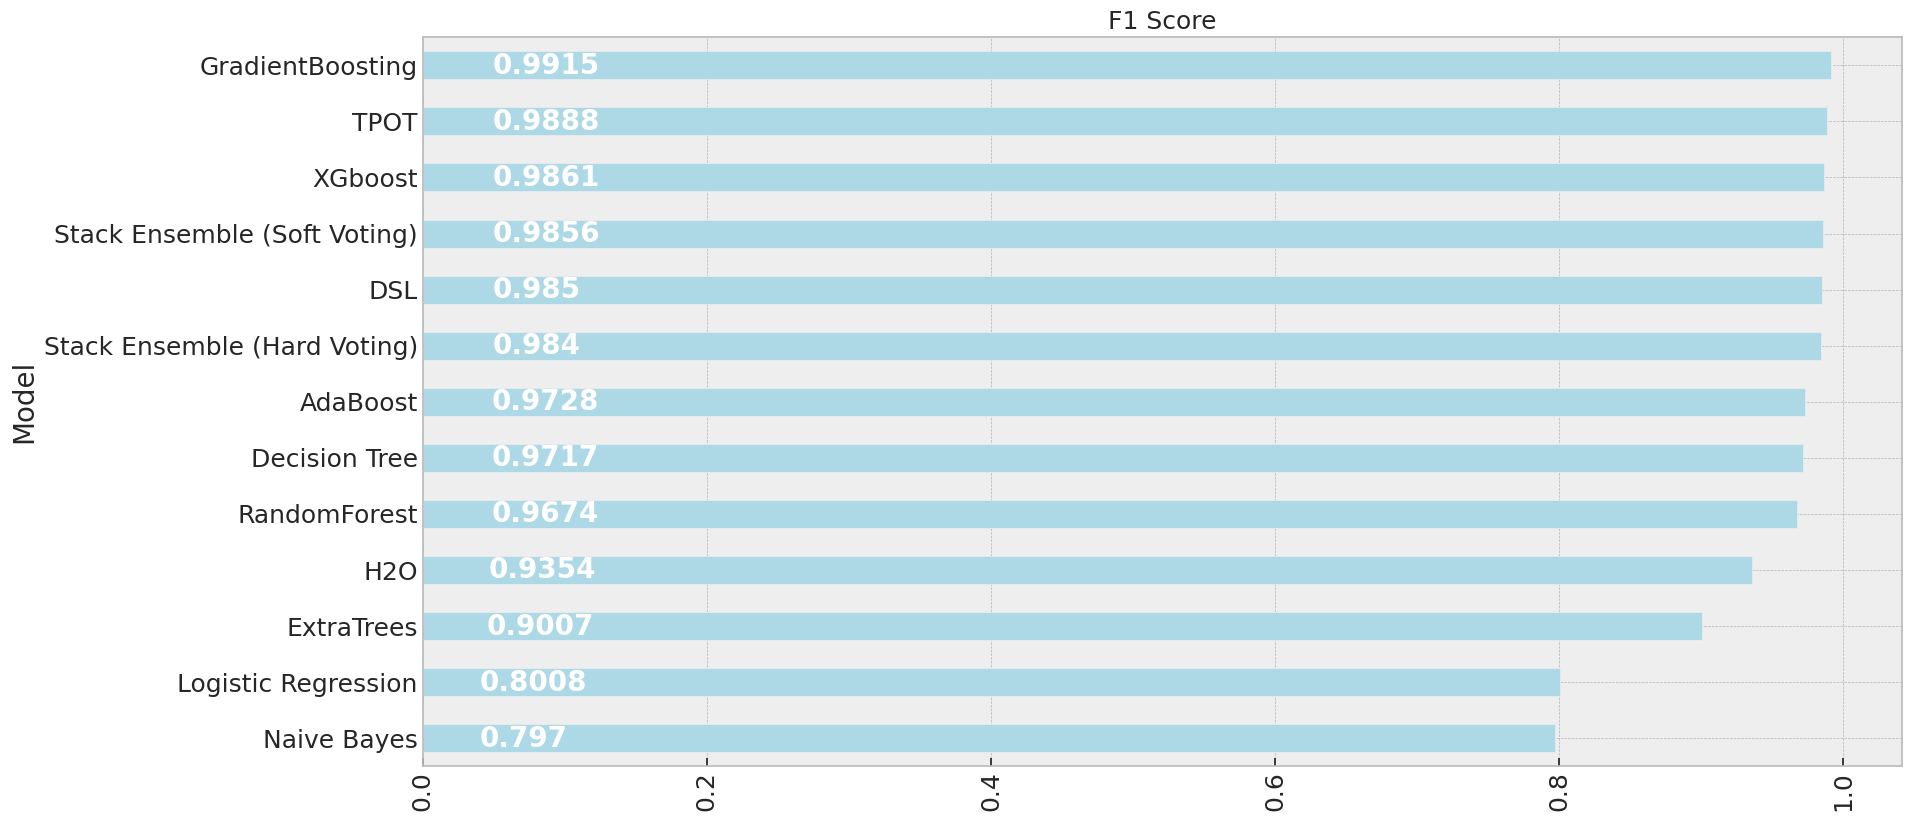

In [ ]:
ax = scoreDF['F1 Score'].sort_values().round(6).plot(kind = 'barh', color = 'lightblue', figsize = (17,9));
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()*0.05, i.get_y()+0.1, \
            str(round((i.get_width()), 4)), fontsize=20,
color='white', fontweight = 'bold')

plt.title('F1 Score', fontsize = 18)
plt.xticks(rotation = 90)
plt.show();



Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

(0.0, 1.0)

(0.0, 1.0)

Text(0.5, 1.0, 'Receiver Operator Characteristic curves')

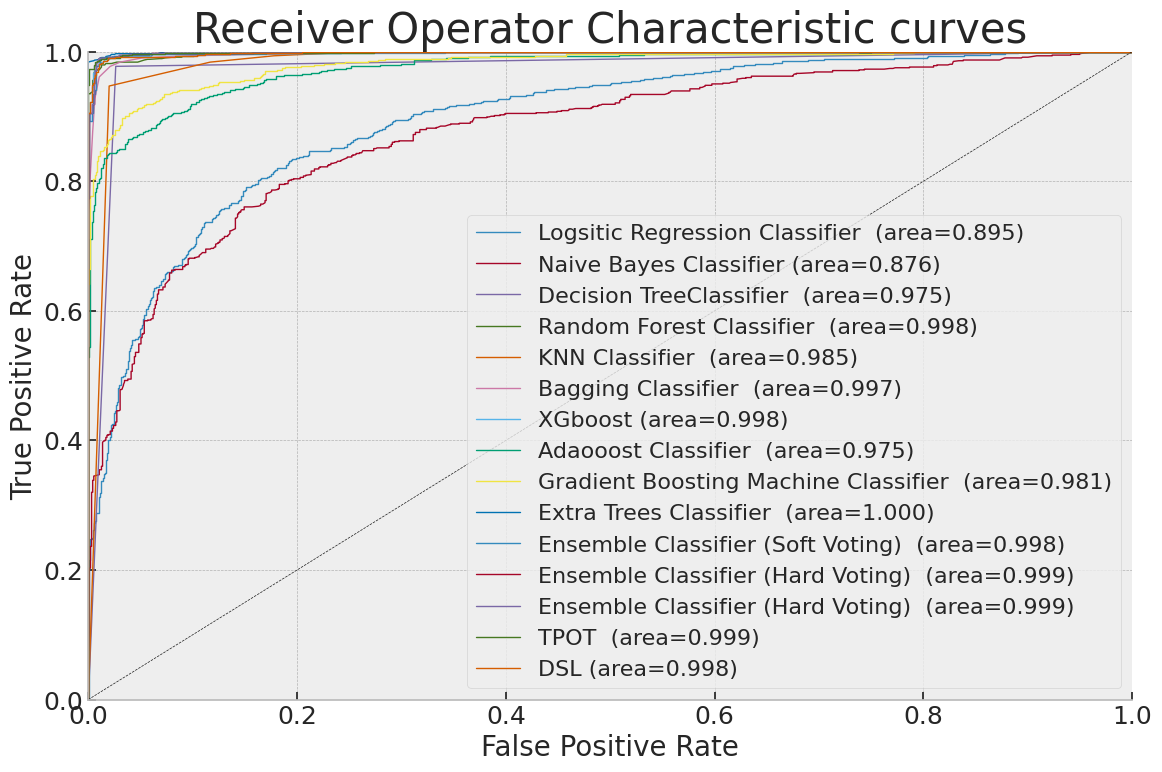

In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,LR.predict_proba(X_test),label='Logsitic Regression Classifier ',l='-')
roc_auc_plot(y_test,NB.predict_proba(X_test),label='Naive Bayes Classifier',l='-')
roc_auc_plot(y_test,DT.predict_proba(X_test),label='Decision TreeClassifier ',l='-')
roc_auc_plot(y_test,RF.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,KNN.predict_proba(X_test),label='KNN Classifier ',l='-')

roc_auc_plot(y_test,BG.predict_proba(X_test),label='Bagging Classifier ',l='-')
roc_auc_plot(y_test,XGB.predict_proba(X_test),label='XGboost',l='-')
roc_auc_plot(y_test,ADA.predict_proba(X_test),label='Adaooost Classifier ',l='-')
roc_auc_plot(y_test,GBM.predict_proba(X_test),label='Gradient Boosting Machine Classifier ',l='-')
roc_auc_plot(y_test,ET.predict_proba(X_test),label='Extra Trees Classifier ',l='-')
roc_auc_plot(y_test,ensemble.predict_proba(X_test),label='Ensemble Classifier (Soft Voting) ',l='-')
roc_auc_plot(y_test,ensemble1.predict_proba(X_test),label='Ensemble Classifier (Hard Voting) ',l='-')
roc_auc_plot(y_test,ensemble1.predict_proba(X_test),label='Ensemble Classifier (Hard Voting) ',l='-')
roc_auc_plot(y_test,tpot.predict_proba(X_test),label='TPOT ',l='-')
roc_auc_plot(y_test,DSL_learner.predict(X_test),label='DSL',l='-')


ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--',
        )
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

In [ ]:
!pip install scikit-plot

<Figure size 1500x700 with 0 Axes>

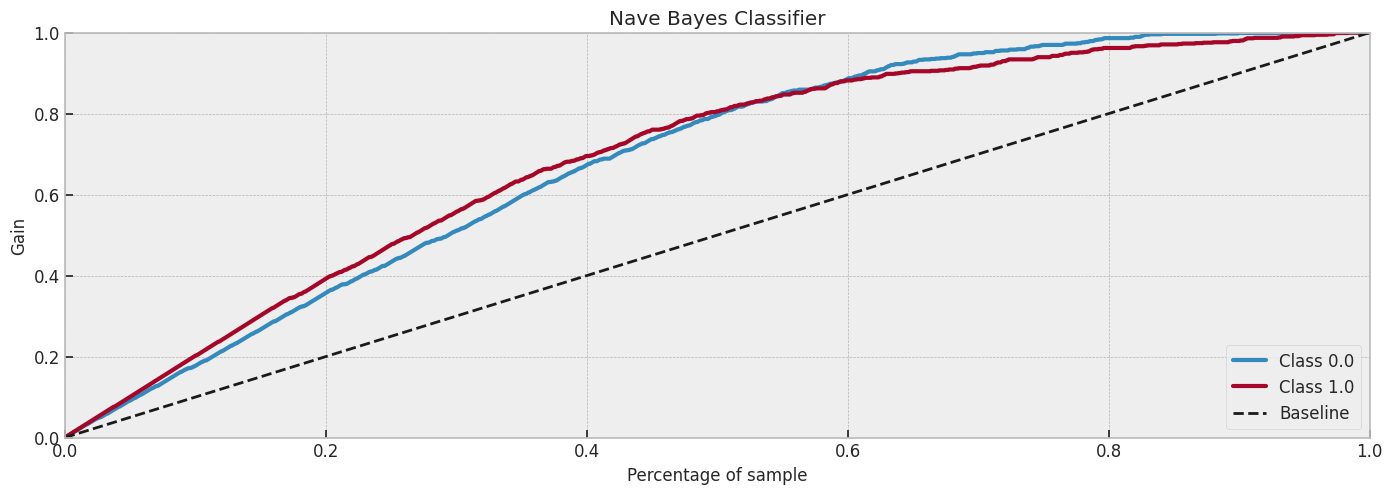

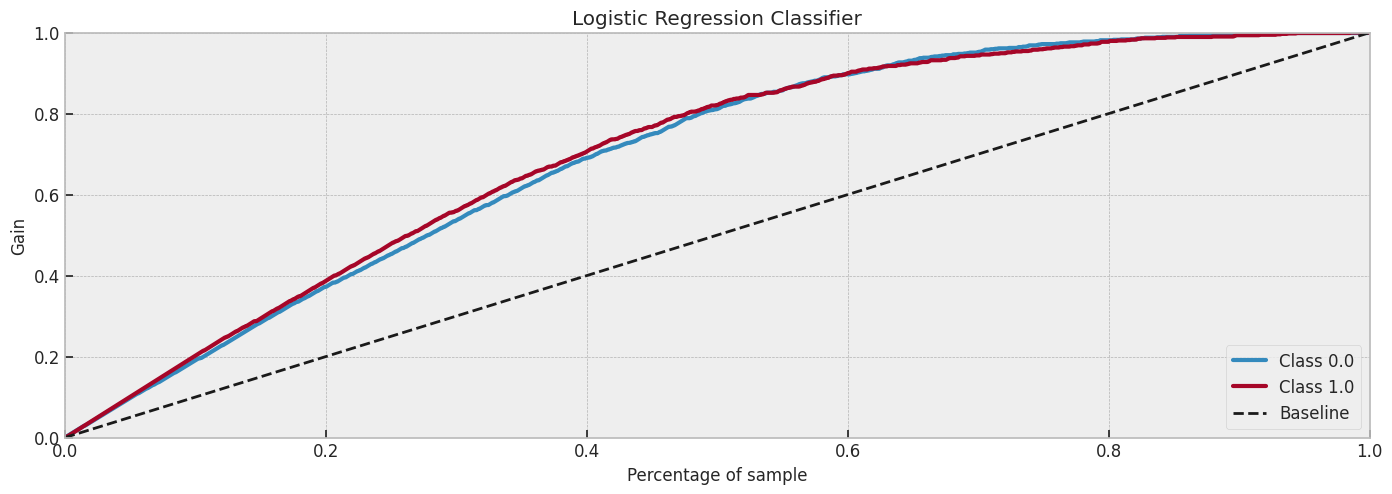

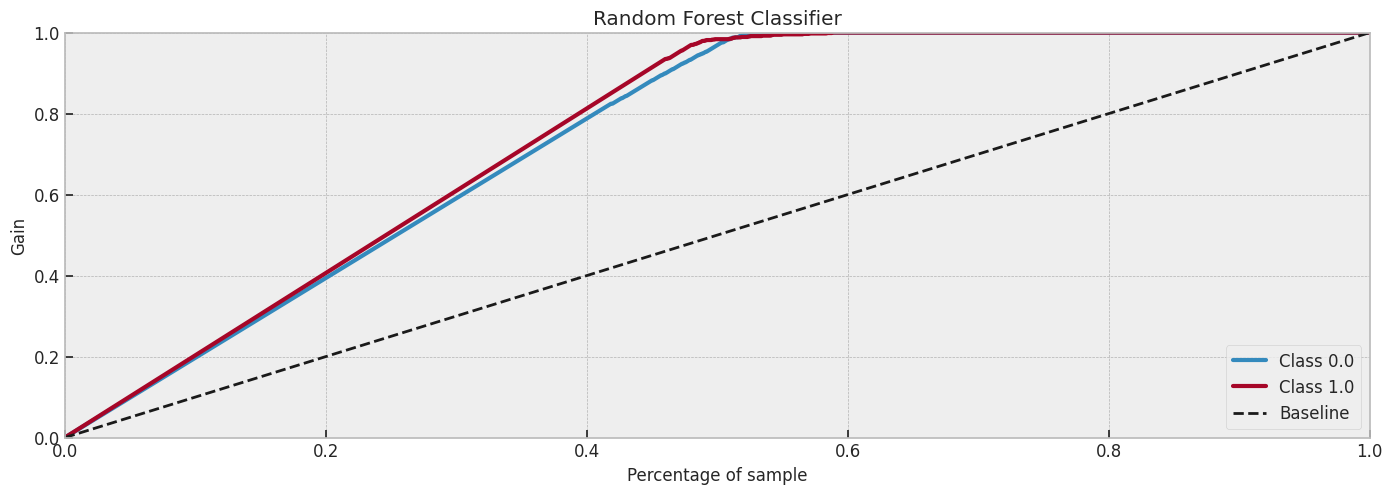

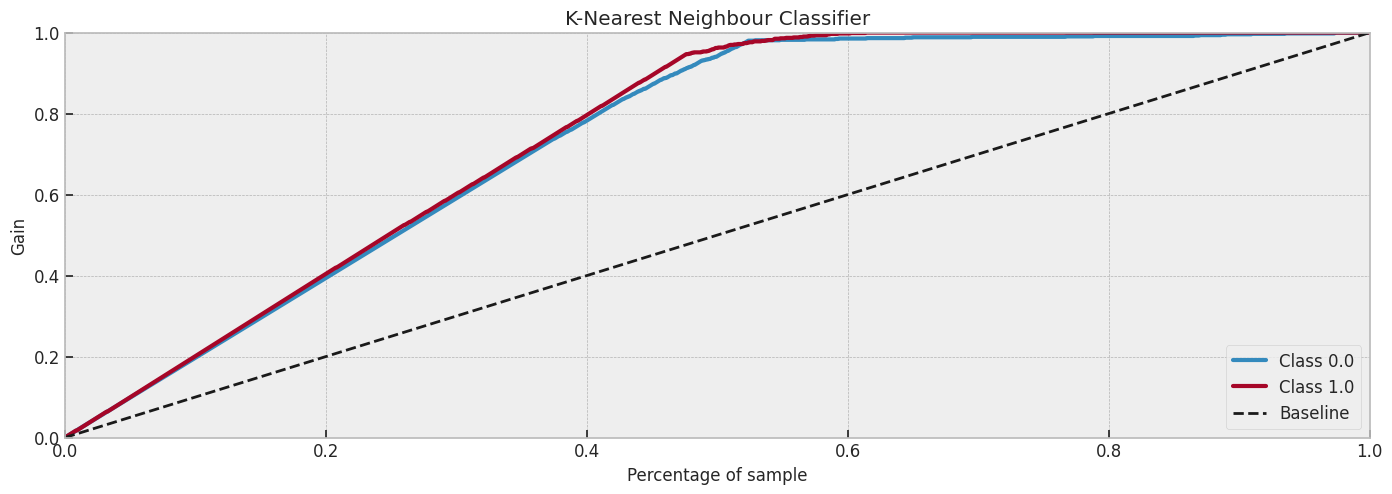

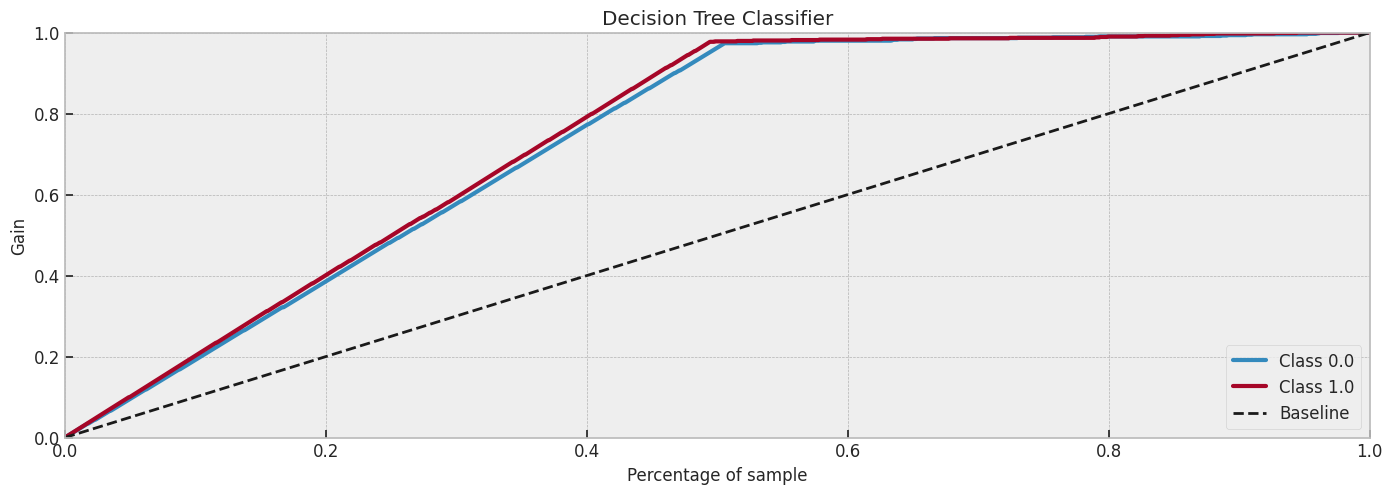

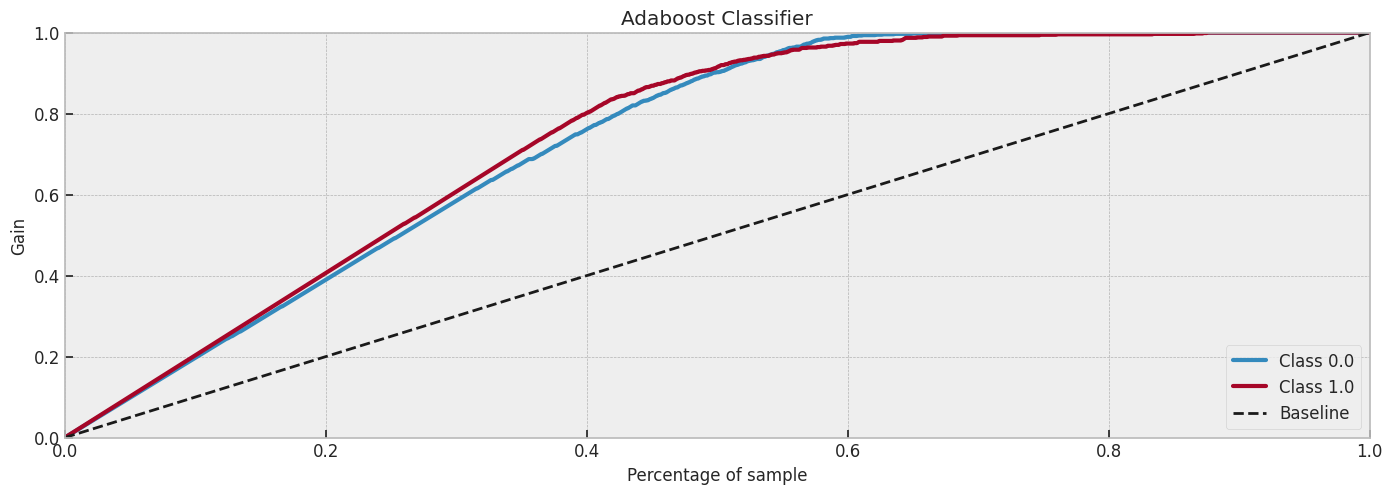

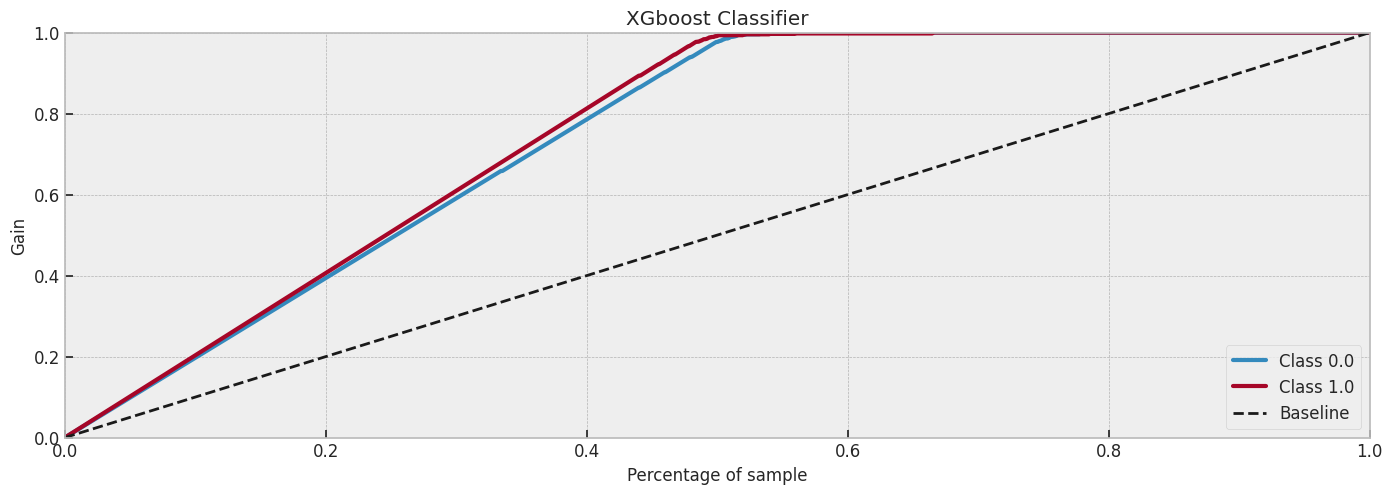

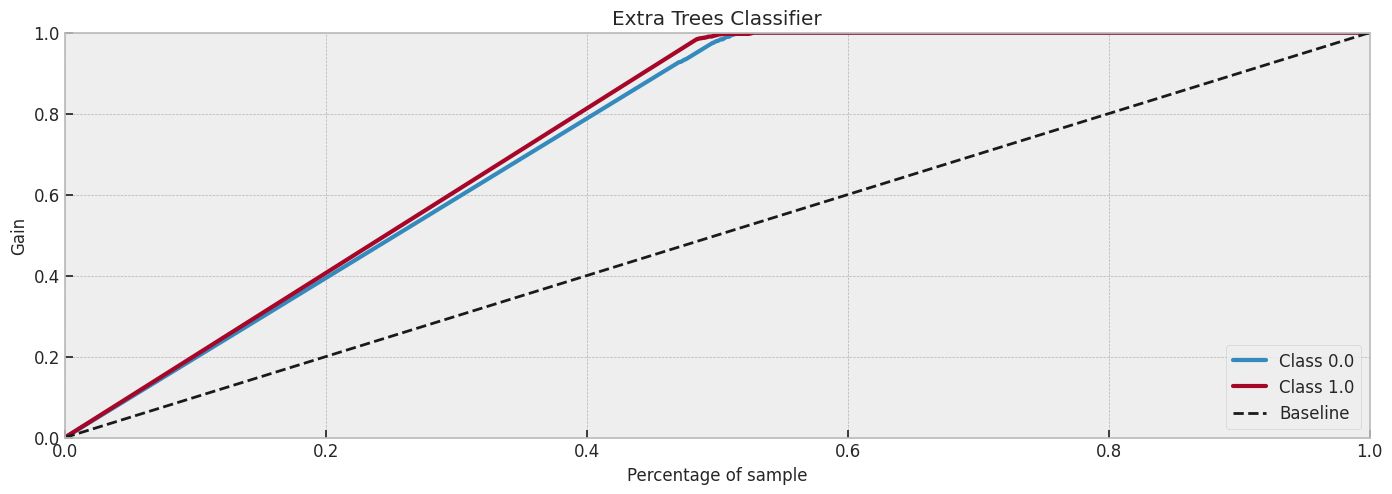

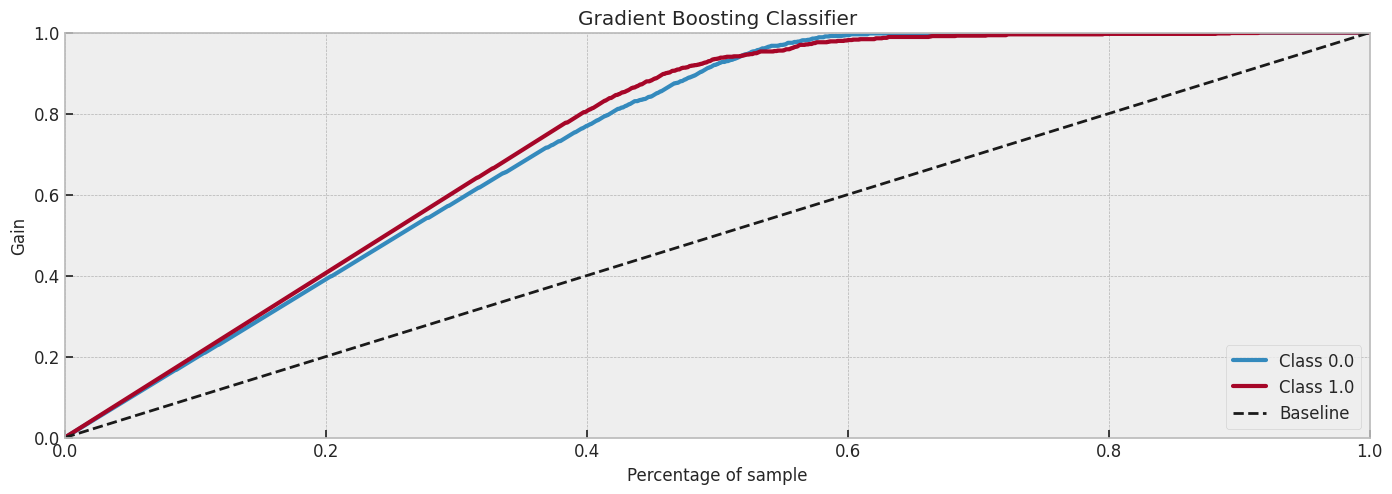

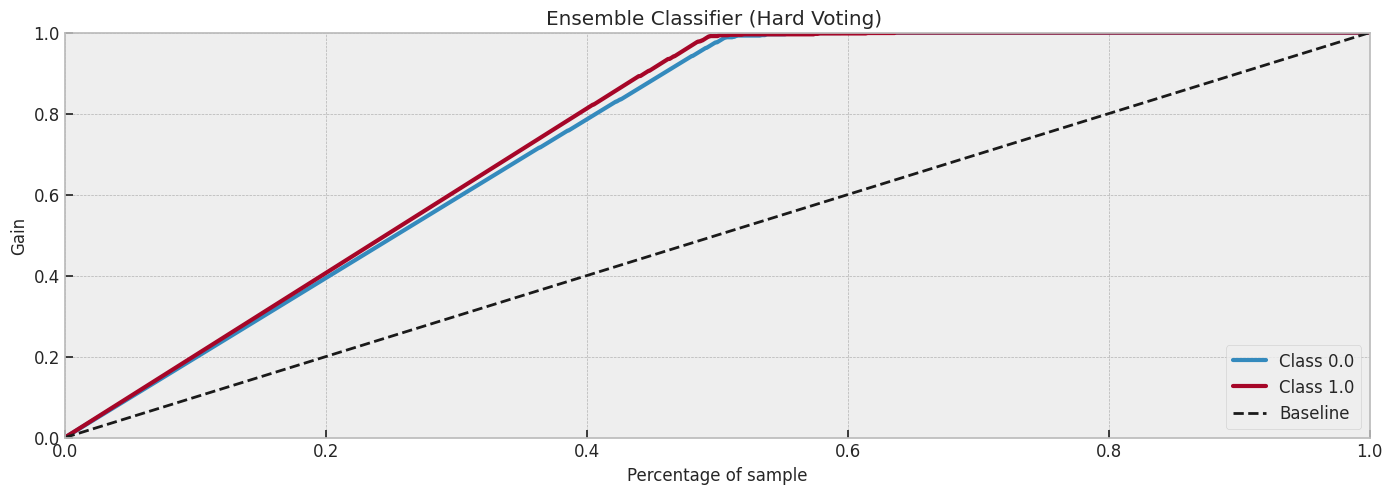

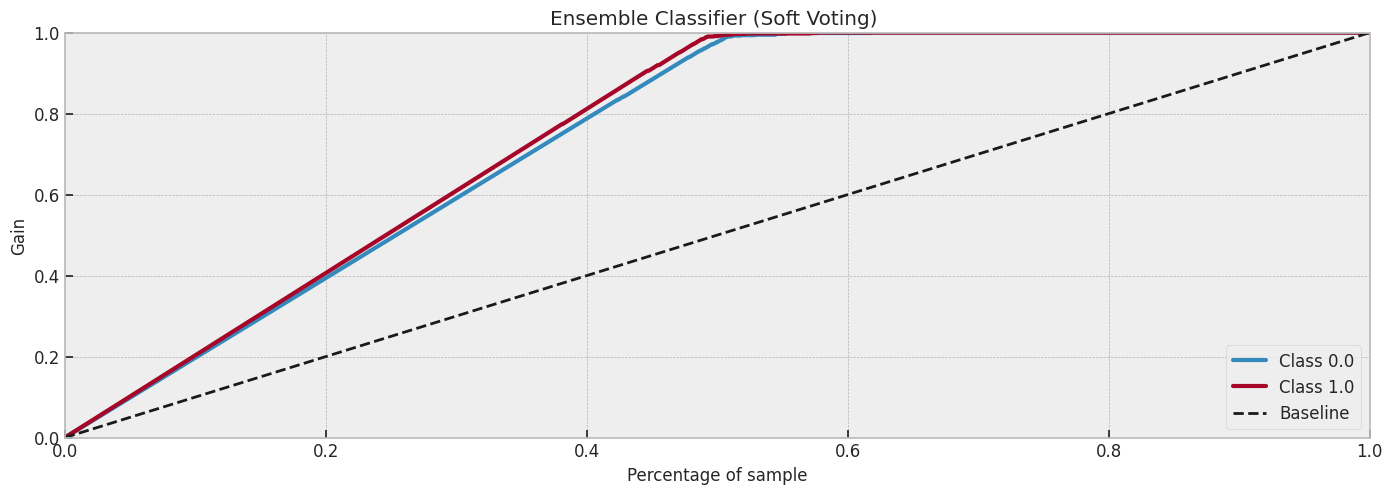

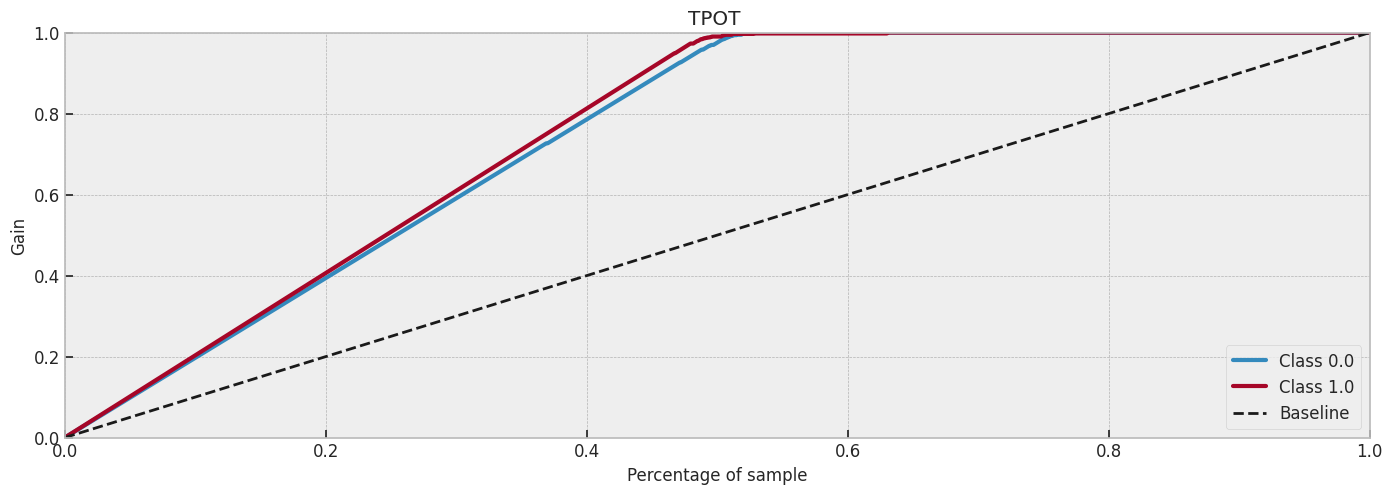

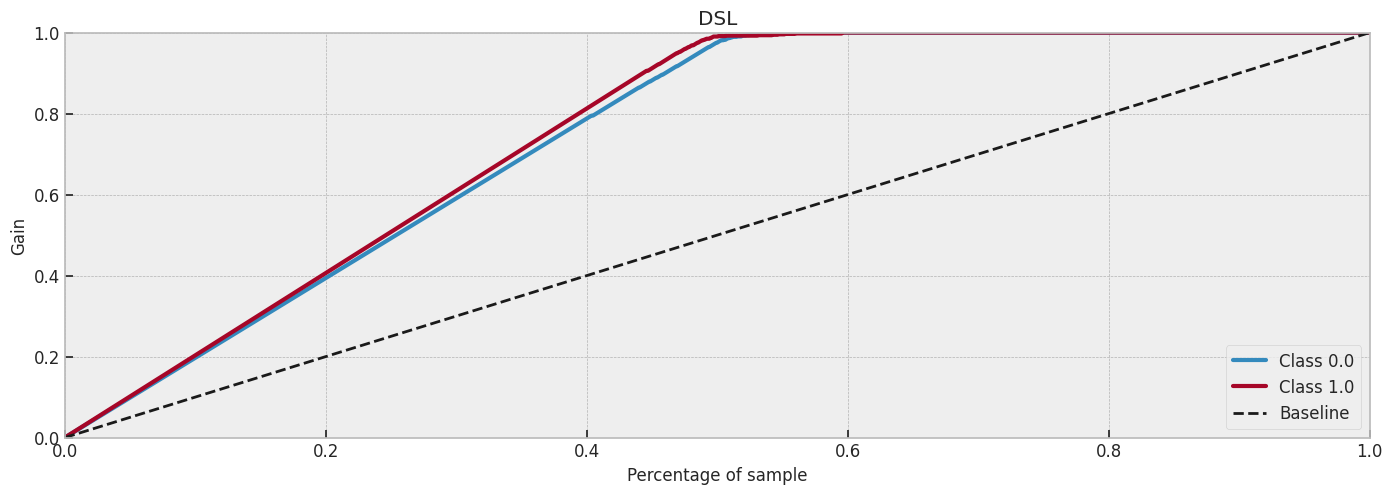

In [ ]:
import scikitplot as skplt


plt.figure(figsize=(15,7))
skplt.metrics.plot_cumulative_gain(y_test.values, NB.predict_proba(X_test), title='Nave Bayes Classifier')
plt.show();
skplt.metrics.plot_cumulative_gain(y_test.values, LR.predict_proba(X_test), title='Logistic Regression Classifier')
plt.show();
skplt.metrics.plot_cumulative_gain(y_test.values, RF.predict_proba(X_test), title='Random Forest Classifier')
plt.show();
skplt.metrics.plot_cumulative_gain(y_test.values, KNN.predict_proba(X_test), title='K-Nearest Neighbour Classifier')
plt.show();
skplt.metrics.plot_cumulative_gain(y_test.values, DT.predict_proba(X_test), title='Decision Tree Classifier')
plt.show();
skplt.metrics.plot_cumulative_gain(y_test.values, ADA.predict_proba(X_test), title='Adaboost Classifier')
plt.show();
skplt.metrics.plot_cumulative_gain(y_test.values, XGB.predict_proba(X_test), title='XGboost Classifier')
plt.show();
skplt.metrics.plot_cumulative_gain(y_test.values, ET.predict_proba(X_test), title='Extra Trees Classifier')
plt.show();
skplt.metrics.plot_cumulative_gain(y_test.values, GBM.predict_proba(X_test), title='Gradient Boosting Classifier')
plt.show();
skplt.metrics.plot_cumulative_gain(y_test.values, ensemble.predict_proba(X_test), title='Ensemble Classifier (Hard Voting) ')
plt.show();
skplt.metrics.plot_cumulative_gain(y_test.values, ensemble1.predict_proba(X_test), title='Ensemble Classifier (Soft Voting) ')
plt.show();

# skplt.metrics.plot_cumulative_gain(y_test.values, binary_predictions, title='H2O')
# plt.show();
skplt.metrics.plot_cumulative_gain(y_test.values, tpot.predict_proba(X_test), title='TPOT ')
plt.show();
skplt.metrics.plot_cumulative_gain(y_test.values, DSL_learner.predict(X_test), title='DSL')
plt.show();